In [1]:
from torchtext.datasets import IMDB, AG_NEWS
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [28]:
def tokenize(label, line):
    return line.lower().split()


def most_common_words(tokens):
    fdist = FreqDist(tokens)

    plt.subplots_adjust(bottom=0.3)
    fdist.plot(30,cumulative=False)


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_bigrams = words_freq[:10]

    x,y=map(list,zip(*top_n_bigrams)) 
    plt.subplots_adjust(left=0.3)
    
    sns.barplot(x=y,y=x)


def show_wordcloud(data):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(' '.join(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)


# AG_NEWS

In [3]:
classes = ['World', 'Sports', 'Business','Sci/Tech']

In [4]:
train_iter = AG_NEWS(split='train')

tokens = []
for label, line in train_iter:
    tokens += tokenize(label, line)

/mnt/c/Users/Z6NER/studia-mgr/sem3/nlp/linux_venv/lib/python3.8/site-packages/torch/utils/data/datapipes/utils/common.py:24: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn(


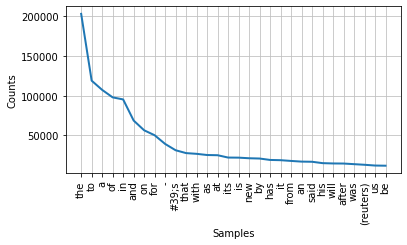

<Figure size 432x288 with 0 Axes>

In [23]:
most_common_words(tokens)

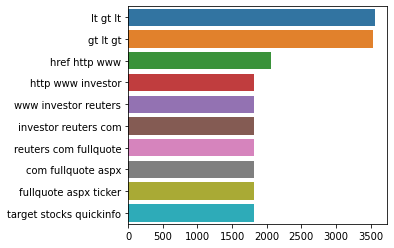

In [25]:
get_top_ngram(tokens, 3)

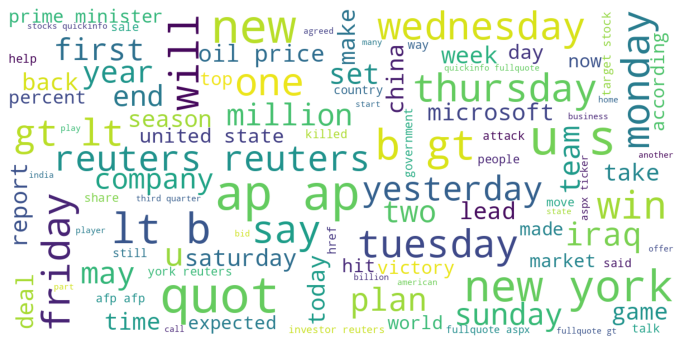

In [27]:
show_wordcloud(tokens)

Notatki:
- klasy równej liczności


# IMDB

In [11]:
train_iter_imdb = IMDB(split='train')

tokens_imdb = []
for label, line in train_iter_imdb:
    tokens_imdb += tokenize(label, line)

/mnt/c/Users/Z6NER/studia-mgr/sem3/nlp/linux_venv/lib/python3.8/site-packages/torch/utils/data/datapipes/utils/common.py:24: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn(
/mnt/c/Users/Z6NER/studia-mgr/sem3/nlp/linux_venv/lib/python3.8/site-packages/torch/utils/data/datapipes/iter/selecting.py:54: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn("Lambda function is not supported for pickle, please use "


In [13]:
print(len(list(train_iter_imdb)))

25000


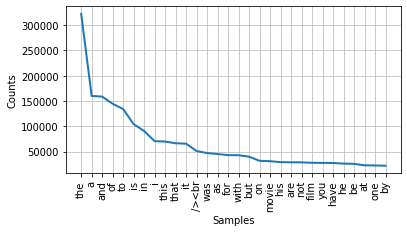

In [19]:
most_common_words(tokens_imdb)

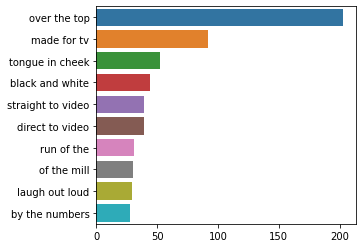

In [29]:
get_top_ngram(tokens_imdb, 3)

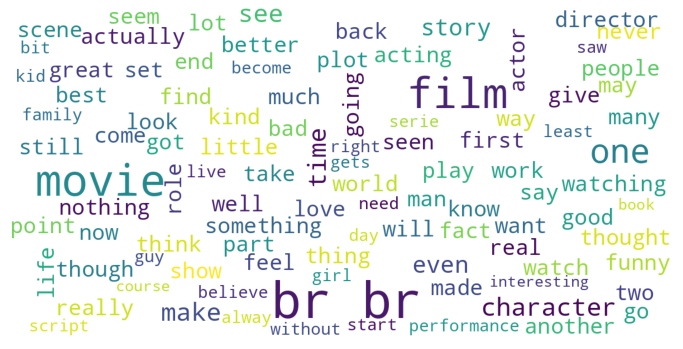

In [16]:
show_wordcloud(tokens_imdb)